# Pyramid Transition Matrix

You are stacking blocks to form a pyramid. Each block has a color, which is represented by a single letter. Each row of blocks contains one less block than the row beneath it and is centered on top.

To make the pyramid aesthetically pleasing, there are only specific triangular patterns that are allowed. A triangular pattern consists of a single block stacked on top of two blocks. The patterns are given as a list of three-letter strings allowed, where the first two characters of a pattern represent the left and right bottom blocks respectively, and the third character is the top block.

For example, "ABC" represents a triangular pattern with a 'C' block stacked on top of an 'A' (left) and 'B' (right) block. Note that this is different from "BAC" where 'B' is on the left bottom and 'A' is on the right bottom.
You start with a bottom row of blocks bottom, given as a single string, that you must use as the base of the pyramid.

Given bottom and allowed, return true if you can build the pyramid all the way to the top such that every triangular pattern in the pyramid is in allowed, or false otherwise.

 

**Example 1:**

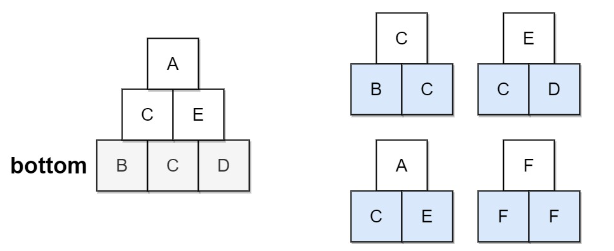

Input: bottom = "BCD", allowed = ["BCC","CDE","CEA","FFF"]

Output: true
Explanation: The allowed triangular patterns are shown on the right.
Starting from the bottom (level 3), we can build "CE" on level 2 and then build "A" on level 1.
There are three triangular patterns in the pyramid, which are "BCC", "CDE", and "CEA". All are allowed.

**Example 2:**

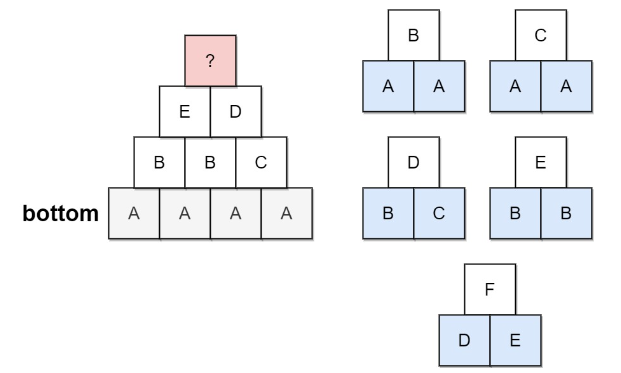

Input: bottom = "AAAA", allowed = ["AAB","AAC","BCD","BBE","DEF"]

Output: false
Explanation: The allowed triangular patterns are shown on the right.
Starting from the bottom (level 4), there are multiple ways to build level 3, but trying all the possibilites, you will get always stuck before building level 1.
 

**Constraints:**

- 2 <= bottom.length <= 6
- 0 <= allowed.length <= 216
- allowed[i].length == 3
- The letters in all input strings are from the set {'A', 'B', 'C', 'D', 'E', 'F'}.
- All the values of allowed are unique.

In [1]:
def pyramidTransition(bottom, allowed):
    # Create a dictionary to store the allowed patterns
    allowed_dict = {}
    for pattern in allowed:
        left, right, top = pattern
        if (left, right) not in allowed_dict:
            allowed_dict[(left, right)] = []
        allowed_dict[(left, right)].append(top)

    # Create a memoization dictionary to store intermediate results
    memo = {}

    def canBuild(row, level):
        # If we've already calculated this combination, return the memoized result
        if (row, level) in memo:
            return memo[(row, level)]

        # Base case: if we've reached the top of the pyramid, return True
        if len(row) == 1:
            return True

        # Check all possible pairs in the current row and try to build the next row
        for i in range(len(row) - 1):
            if (row[i], row[i + 1]) in allowed_dict:
                for top in allowed_dict[(row[i], row[i + 1])]:
                    if canBuild(row[:i] + top + row[i + 2:], level + 1):
                        memo[(row, level)] = True
                        return True

        # If no valid combination is found, return False
        memo[(row, level)] = False
        return False

    # Start the recursive process with the bottom row and level 1
    return canBuild(bottom, 1)

# Example usage:
bottom = "BCD"
allowed = ["BCC", "CDE", "CEA", "FFF"]
print(pyramidTransition(bottom, allowed))  # Output: True

bottom = "AAAA"
allowed = ["AAB", "AAC", "BCD", "BBE", "DEF"]
print(pyramidTransition(bottom, allowed))  # Output: False

True
True
